<h2> Insurance Industry Challlenge <h2>

<h2> Problem Statement:<h2>

Given the underrepresentation of Africa's insurance industry in the global market, our objective is to identify and address the key barriers to insurance adoption. We aim to develop a comprehensive solution that increases market penetration, enhances consumer education, and offers affordable insurance products tailored to the unique economic and social conditions of the African market. This solution should leverage data-driven insights and strategic partnerships to optimize client targeting and improve overall industry value. 

<h2>Import Libraries</h2>

In [2]:
import pandas as pd #data preprocessing
from openpyxl import load_workbook
import numpy as np

#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing data
from sklearn.preprocessing import OneHotEncoder

#for cross validation and model selection
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score

#for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics 

#for balancing data
from imblearn.over_sampling import SMOTE  # Importing SMOTE directly instead of RandomOverSampler

##metrics 
#metrics for model evaluation and validation
from sklearn.metrics import f1_score, roc_auc_score, matthews_corrcoef, recall_score, precision_score
from sklearn.metrics import balanced_accuracy_score, auc, roc_curve, precision_recall_curve, log_loss, average_precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve


import time
%matplotlib inline
#To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

import os 
import time

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
!pip install --upgrade openpyxl

<h2>Load the Data</h2>

In [3]:
# Load the CSV dataset
file_path = r"C:\Users\mpumi\Downloads\insurance_claims_raw.csv"
data = pd.read_csv(file_path)

In [4]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,NaN


In [5]:
print(data.columns)

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')


In [6]:
print('The training dataset has {} samples and {} features.'.format(data.shape[0], data.shape[1]-1))

The training dataset has 1000 samples and 39 features.


In [7]:
# Display the first few rows
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,NaN


<h2>EDA on Insurance Claims Data</h2>

<h2>Data Cleaning</h2>

In [8]:
print(data.head())

   months_as_customer   age  policy_number policy_bind_date policy_state  \
0                 328  48.0         521585       2014-10-17           OH   
1                 228  42.0         342868       2006-06-27           IN   
2                 134  29.0         687698       2000-09-06           OH   
3                 256  41.0         227811       1990-05-25           IL   
4                 228  44.0         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500             1000.0                1406.91               0   
1    250/500             2000.0                1197.22         5000000   
2    100/300             2000.0                1413.14         5000000   
3    250/500             2000.0                1415.74         6000000   
4   500/1000             1000.0                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...

In [9]:
# Remove the _c39 column
data.drop(columns=['_c39'], inplace=True)

In [10]:
# Fill missing values
# Numerical columns: Use median
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

In [11]:
# Categorical columns: Use mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [12]:
data.isnull().sum()

# Verify no missing values remain
print(data.isnull().sum())

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [13]:
# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

In [14]:
print(data.columns)

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       ...
       'auto_model_RAM', 'auto_model_RSX', 'auto_model_Silverado',
       'auto_model_TL', 'auto_model_Tahoe', 'auto_model_Ultima',
       'auto_model_Wrangler', 'auto_model_X5', 'auto_model_X6',
       'fraud_reported_Y'],
      dtype='object', length=2155)


In [15]:
# Split the data into features and target
X = data.drop(columns=['fraud_reported_Y'])
y = data['fraud_reported_Y'].apply(lambda x: 1 if x == 'Y' else 0)

In [16]:
print(data.info())
print(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 2155 entries, months_as_customer to fraud_reported_Y
dtypes: float64(7), int64(11), uint8(2137)
memory usage: 2.2 MB
None
       months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.961000  546238.648000        1134.000000   
std            115.113174     9.126378  257063.005276         610.669237   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 2155 entries, months_as_customer to fraud_reported_Y
dtypes: float64(7), int64(11), uint8(2137)
memory usage: 2.2 MB


In [19]:
data.isna().sum().sum()

0

In [20]:
data.head(10)

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported_Y
0,328,48.0,521585,1000.0,1406.91,0,466132,53300.0,0,5,...,0,0,0,0,0,0,0,0,0,1
1,228,42.0,342868,2000.0,1197.22,5000000,468176,0.0,0,8,...,0,0,0,0,0,0,0,0,0,1
2,134,29.0,687698,2000.0,1413.14,5000000,430632,35100.0,0,7,...,1,0,0,0,0,0,0,0,0,0
3,256,41.0,227811,2000.0,1415.74,6000000,608117,48900.0,-62400,5,...,0,0,0,0,1,0,0,0,0,1
4,228,44.0,367455,1000.0,1583.91,6000000,610706,66000.0,-46000,20,...,0,1,0,0,0,0,0,0,0,0
5,256,39.0,104594,1000.0,1351.10,0,478456,0.0,0,19,...,0,0,0,0,0,0,0,0,0,1
6,137,34.0,413978,1000.0,1333.35,0,441716,0.0,-77000,0,...,0,0,0,0,0,0,0,0,0,0
7,165,37.0,429027,1000.0,1137.03,0,603195,0.0,0,23,...,0,0,0,0,0,0,0,0,0,0
8,27,33.0,485665,500.0,1442.99,0,601734,0.0,0,21,...,0,0,0,0,0,0,0,0,0,0
9,212,42.0,636550,500.0,1315.68,0,600983,0.0,-39300,14,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported_Y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.961000,546238.648000,1134.000000,1257.003600,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,...,0.043000,0.01200,0.022000,0.02000,0.024000,0.023000,0.04200,0.023000,0.016000,0.247000
std,115.113174,9.126378,257063.005276,610.669237,243.898015,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,...,0.202959,0.10894,0.146757,0.14007,0.153126,0.149978,0.20069,0.149978,0.125538,0.431483
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1090.567500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.830000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,...,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [22]:
data.age.describe()

count    1000.000000
mean       38.961000
std         9.126378
min        19.000000
25%        32.000000
50%        38.000000
75%        44.000000
max        64.000000
Name: age, dtype: float64

In [23]:
# Display the first few rows of X_train and y_train to verify the split
print(X_train.head())
print(y_train.head())

     months_as_customer   age  policy_number  policy_deductable  \
29                  241  45.0         596785             2000.0   
535                  65  23.0         876699             1000.0   
695                 289  45.0         943425             2000.0   
557                  63  26.0         550930              500.0   
836                 257  43.0         797636             1000.0   

     policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
29                 1104.50               0       432211            0.0   
535                1099.95               0       473109            0.0   
695                1221.41               0       466289        46700.0   
557                1500.04         6000000       613826            0.0   
836                 974.84               0       468984        52100.0   

     capital-loss  incident_hour_of_the_day  ...  auto_model_Pathfinder  \
29              0                         5  ...                      0   
53

In [24]:
def convert_datetime_features(data):
    for col in data.columns:
        if np.issubdtype(data[col].dtype, np.datetime64):
            data[col] = data[col].astype('int64') / 10**9  # Convert to seconds since epoch
    return data

# Apply the function to the train and test sets
X_train = convert_datetime_features(X_train)
X_test = convert_datetime_features(X_test)



In [25]:
def check_and_convert_types(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            try:
                data[col] = data[col].astype(float)
            except ValueError:
                print(f"Column {col} cannot be converted to float directly.")
    return data

X_train = check_and_convert_types(X_train)
X_test = check_and_convert_types(X_test)


In [26]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


C:\Users\mpumi\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [27]:
# Check class distribution in y_train
print(y_train.value_counts())

0    800
Name: fraud_reported_Y, dtype: int64


In [28]:
y.value_counts()

0    1000
Name: fraud_reported_Y, dtype: int64

In [29]:
# Perform the train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the distribution of the target variable after splitting
print("Class distribution in training set:")
print(y_train.value_counts())
print("Class distribution in testing set:")
print(y_test.value_counts())


Class distribution in training set:
0    800
Name: fraud_reported_Y, dtype: int64
Class distribution in testing set:
0    200
Name: fraud_reported_Y, dtype: int64


<h2>Univariate Analysis<h2>

<h2>Feature Analysis<h2>

Numeric Features

In [37]:
num_cols = ['months_as_customer', 'age', 'policy_annual_premium', 'policy_deductable', 'umbrella_limit','insured_zip','incident_hour_of_the_day','capital-gains','fraud_reported_Y']

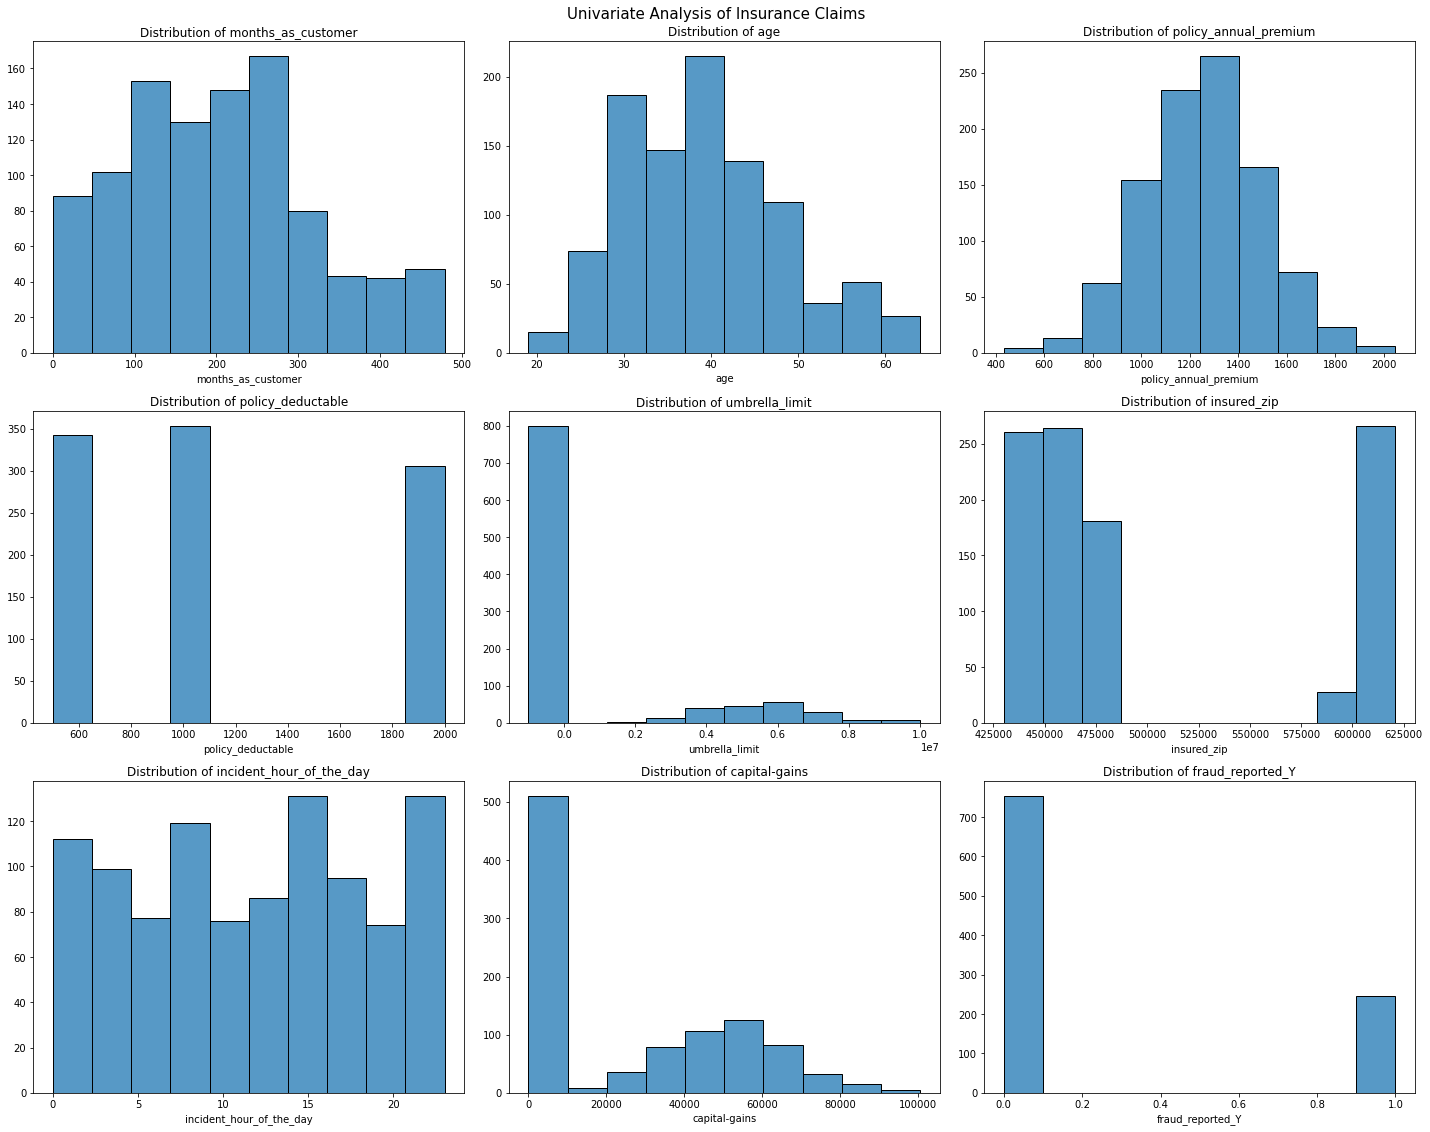

In [40]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,16))
fig.suptitle('Univariate Analysis of Insurance Claims', fontsize = 15)

axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.histplot(data = data[num_cols], x = column, bins = 10, ax = axes[i]) 
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(f'{column}')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.subplots_adjust(top = 0.95)
plt.show()    

Comment

The features: A'months_as_customer', 'age', 'policy_annual_premium' and 'incident_hour_of_the_day' are uniformly distrubted and do not exhibit extreme or outlier values. Thus, we will normalise the features to lie within the [0,1] range, to speed up convergence during the modelling phase.

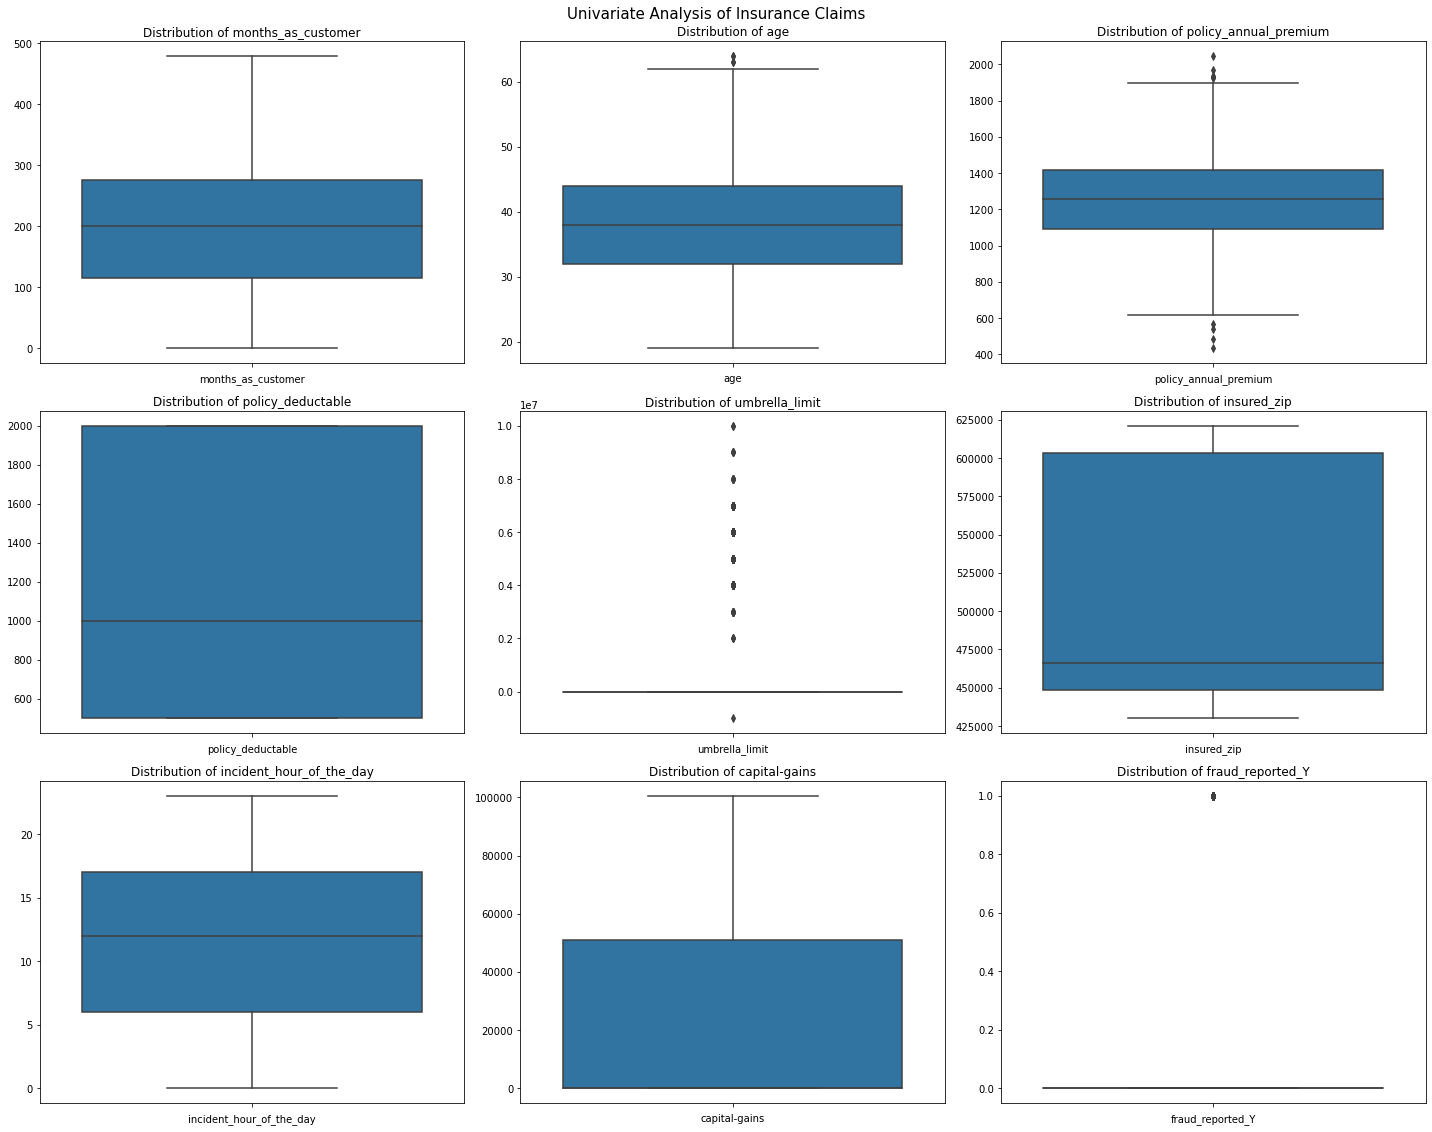

In [41]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,16))
fig.suptitle('Univariate Analysis of Insurance Claims', fontsize = 15)

axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.boxplot(data = data[num_cols], y = column, ax = axes[i]) 
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(f'{column}')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.subplots_adjust(top = 0.95)
plt.show()

<h2>Discrete Variables<h2>

In [48]:
discrete_cols = ['fraud_reported_Y','incident_hour_of_the_day']

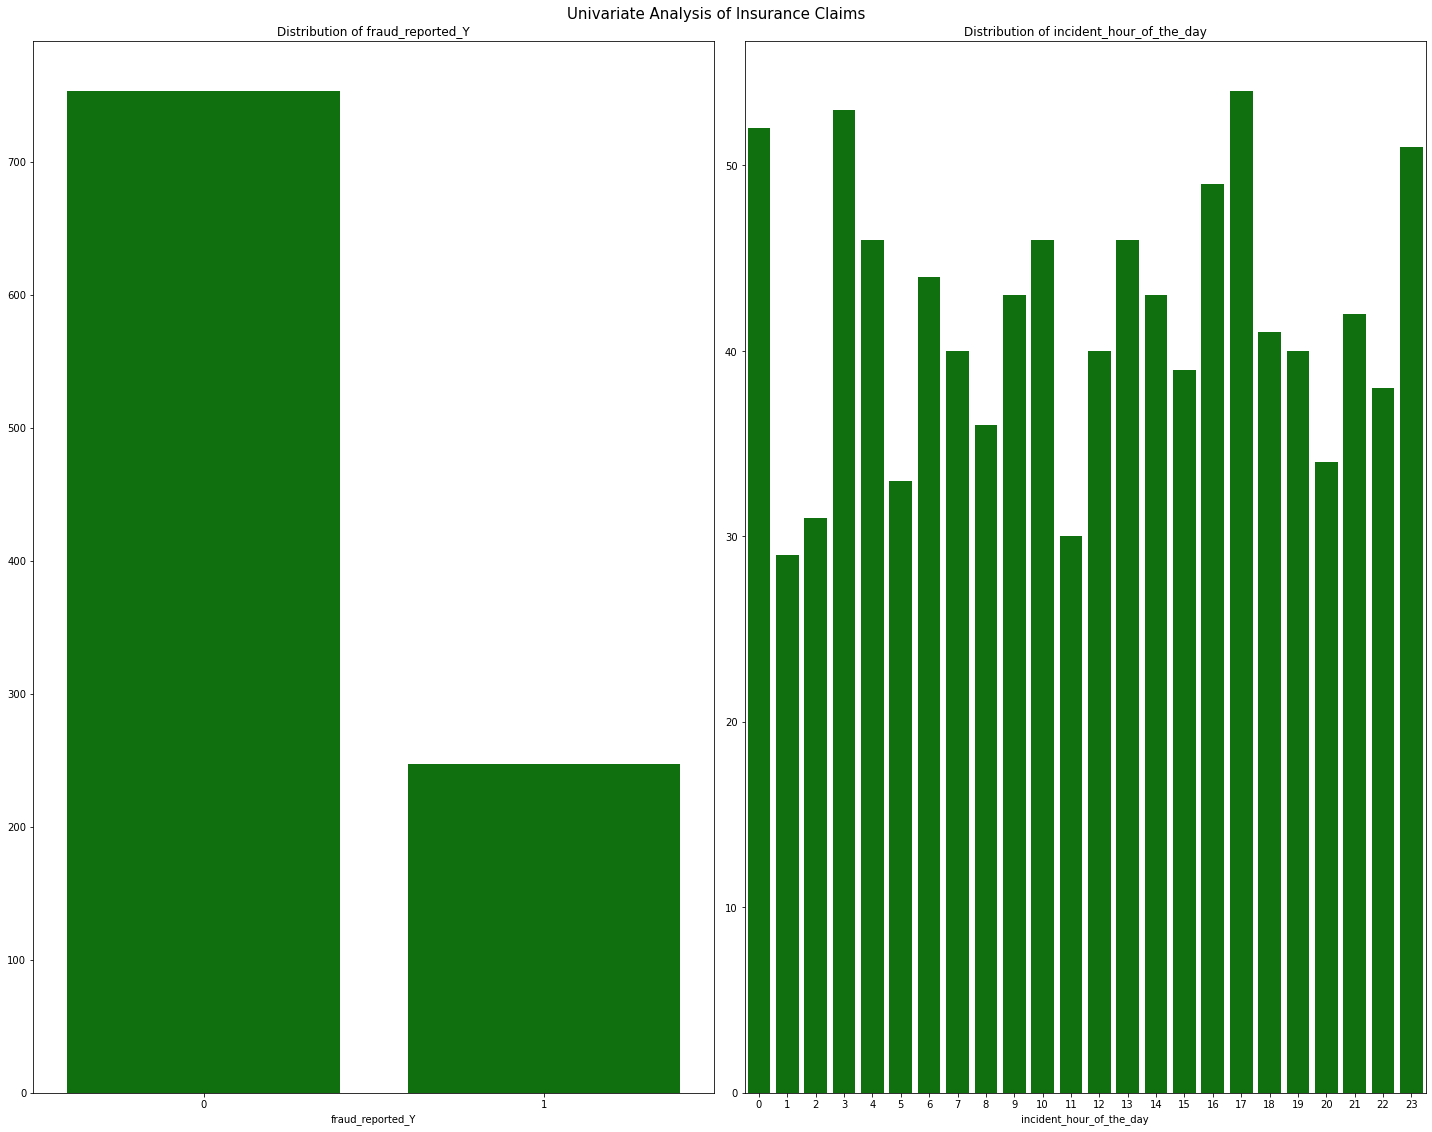

In [50]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,16))
fig.suptitle('Univariate Analysis of Insurance Claims', fontsize = 15)

axes = axes.flatten()

for i, column in enumerate(discrete_cols):
    sns.countplot(data = data[discrete_cols], x = column, color = 'green', ax = axes[i]) 
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(f'{column}')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.subplots_adjust(top = 0.95)
plt.show()

**Comment**: `incident_hour_of_the_day` and `fraud_reported_Y` are discrete features, and the values are almost evenly distributed across the categories for each feature.

<h2>Categorical Features<h2>

In [56]:
cat_cols = [ 'incident_hour_of_the_day', 'fraud_reported_Y']

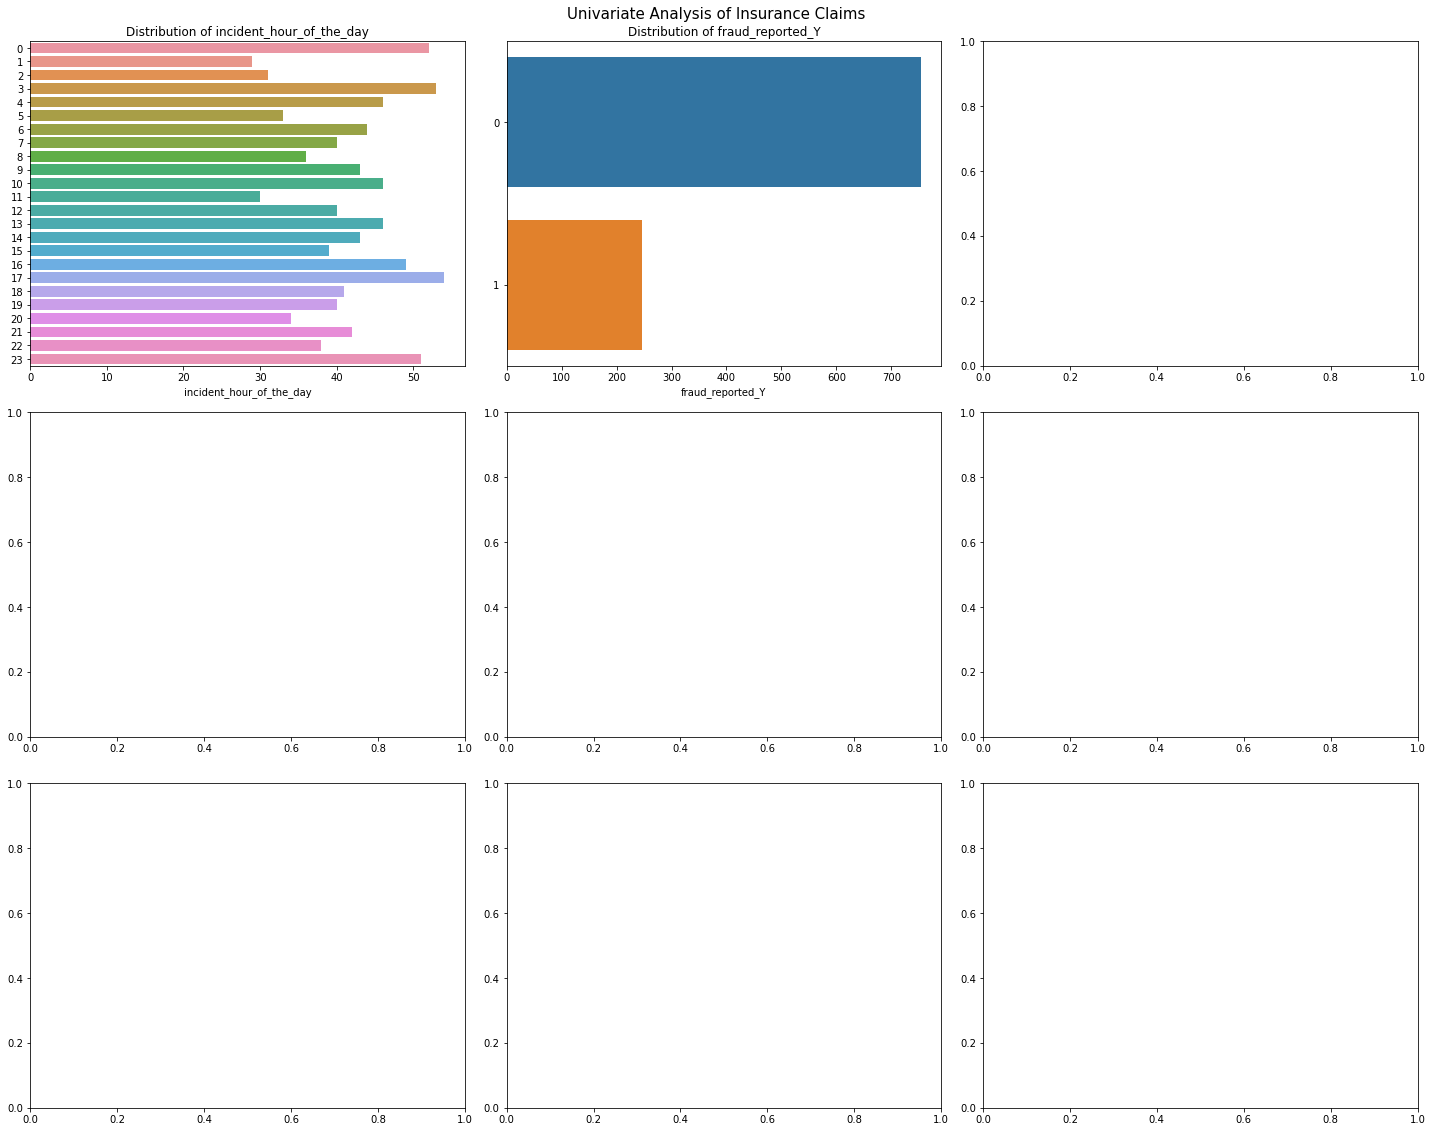

In [57]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,16))
fig.suptitle('Univariate Analysis of Insurance Claims', fontsize = 15)

axes = axes.flatten()

for i, column in enumerate(cat_cols):
    sns.countplot(data = data[cat_cols], y = column, ax = axes[i]) 
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(f'{column}')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.subplots_adjust(top = 0.95)
plt.show()

<h2>Correlation Analysis<h2>

In [61]:
#creating a function for correlation measures
def corr_display(data, correlation_measure = 'pearson'):
    sns.set_theme(style="white")

    # Compute the correlation matrix
    corr_ = data.corr(method = correlation_measure)

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Correlation: ' + str.capitalize(correlation_measure))
    plt.show()

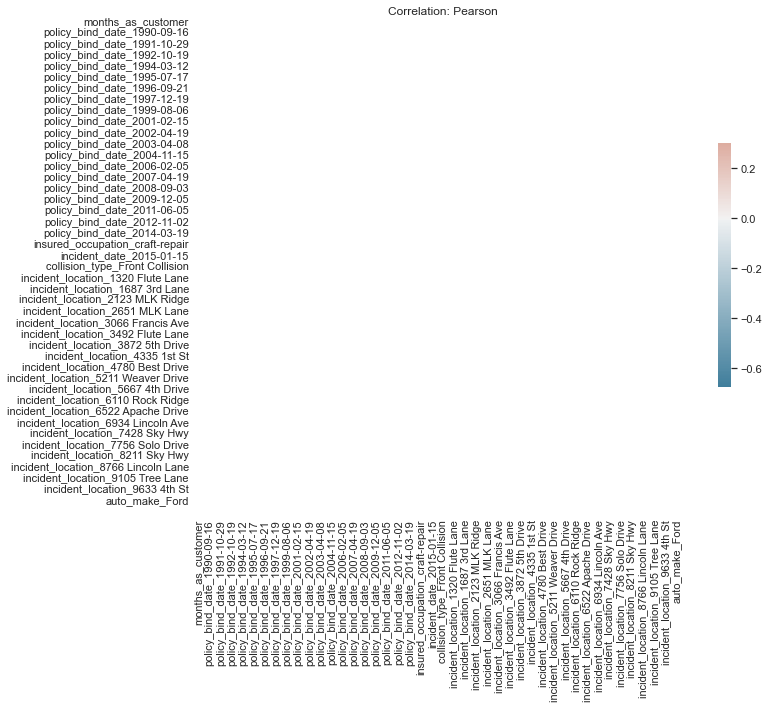

In [62]:
#evaluation correlation between features using Person method
corr_display(data.select_dtypes(exclude='object'))

<h2>Target Variable Exploration<h2>

The dataset has 2 classes, which correspond to whether an individual defaulted or not. We will now explore their distribution.

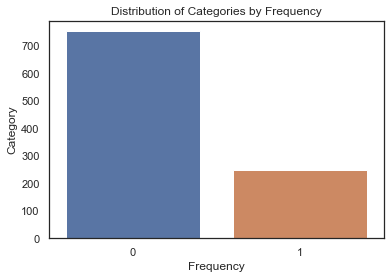

In [65]:
#count of categories
sns.countplot(x = 'fraud_reported_Y', data = data)
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Distribution of Categories by Frequency')
plt.show()

In [68]:
data['fraud_reported_Y'].value_counts(normalize=True)*100

0    75.3
1    24.7
Name: fraud_reported_Y, dtype: float64